In [2]:
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

# Download data 

In [3]:
dataset = pd.read_csv('glass.csv')
dataset = dataset.fillna(dataset.mean())
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Plots

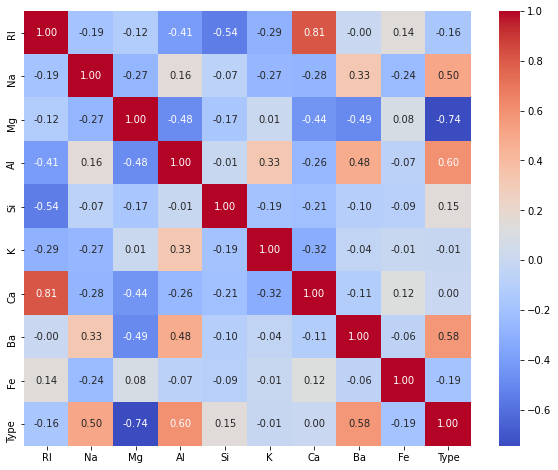

In [4]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

<Figure size 432x288 with 0 Axes>

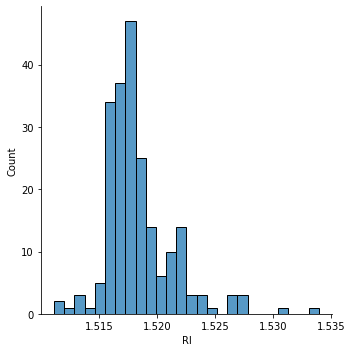

<Figure size 432x288 with 0 Axes>

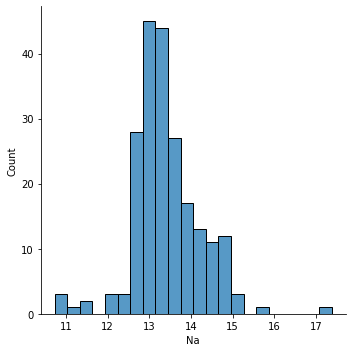

<Figure size 432x288 with 0 Axes>

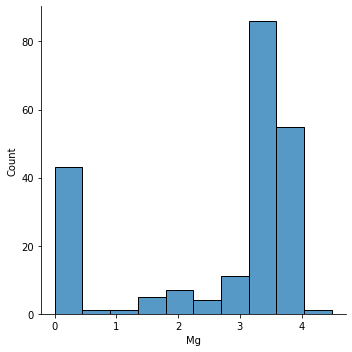

<Figure size 432x288 with 0 Axes>

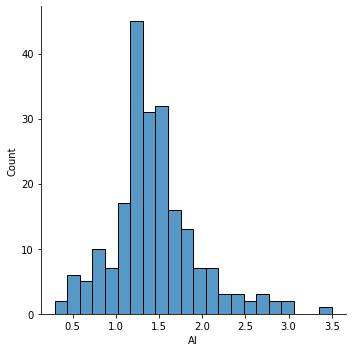

<Figure size 432x288 with 0 Axes>

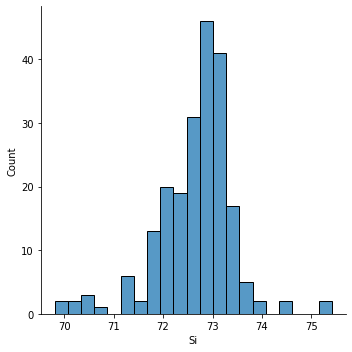

<Figure size 432x288 with 0 Axes>

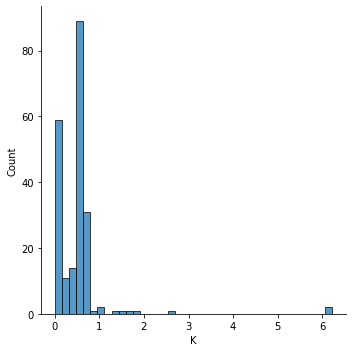

<Figure size 432x288 with 0 Axes>

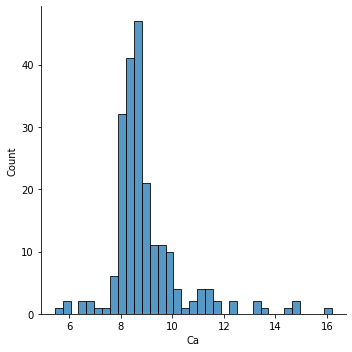

<Figure size 432x288 with 0 Axes>

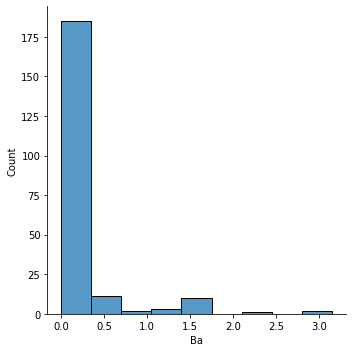

<Figure size 432x288 with 0 Axes>

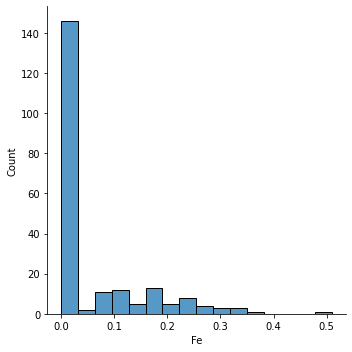

In [5]:
feature_names = list(dataset.columns)
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.displot(dataset[feature_names[i]])

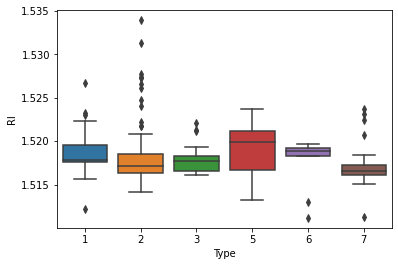

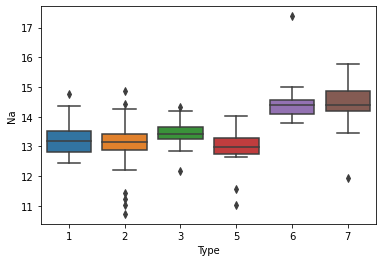

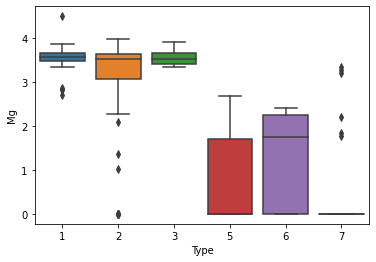

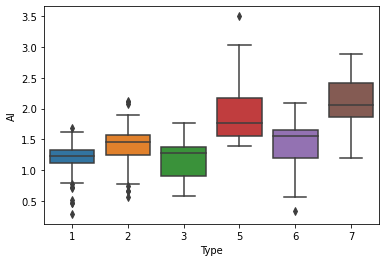

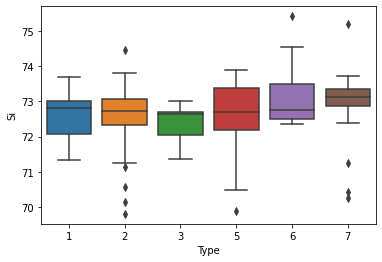

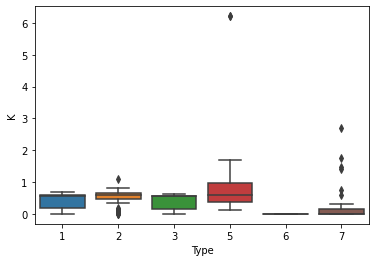

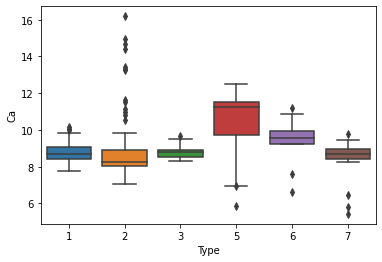

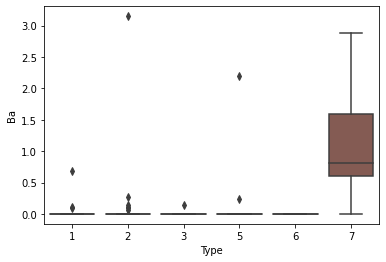

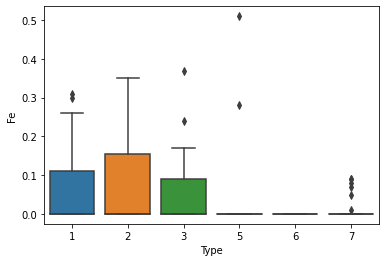

In [6]:
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='Type', y=feature_names[i], data=dataset)

# Split the dataset into train and test 

In [7]:
X = dataset.drop('Type', axis = 1).values
y = dataset['Type'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [9]:
grid_params = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,10,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, grid_params, cv = 3)
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [10]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)
y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)
print('The grid_params combination that would give best accuracy is : ')
print(classifier_knn.best_params_)

Training set:  1.0
Test set:  0.7407407407407407
The grid_params combination that would give best accuracy is : 
{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance'}


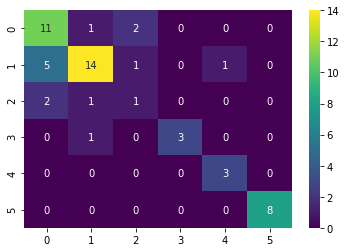

              precision    recall  f1-score   support

           1       0.61      0.79      0.69        14
           2       0.82      0.67      0.74        21
           3       0.25      0.25      0.25         4
           5       1.00      0.75      0.86         4
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         8

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.73        54
weighted avg       0.76      0.74      0.74        54



In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_knn_test))

# SVC

In [12]:
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_pipe = Pipeline(steps)

In [13]:
grid_params = { 'model__kernel' : ['linear','rbf'],
               'model__C' : [1,10,100,1000,10000],
               'model__random_state' : [42],
               'model__gamma' : ['scale','auto']
}
classifier_svm = GridSearchCV(svm_pipe, grid_params, cv = 3)
classifier_svm = classifier_svm.fit(X_train, y_train.ravel())

In [14]:
y_pred_svm_train = classifier_svm.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print("Training set: ", accuracy_svm_train)
y_pred_svm_test = classifier_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("Test set: ", accuracy_svm_test)

Training set:  0.94375
Test set:  0.7222222222222222


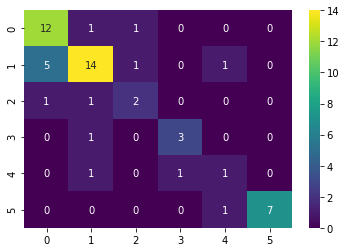

              precision    recall  f1-score   support

           1       0.67      0.86      0.75        14
           2       0.78      0.67      0.72        21
           3       0.50      0.50      0.50         4
           5       0.75      0.75      0.75         4
           6       0.33      0.33      0.33         3
           7       1.00      0.88      0.93         8

    accuracy                           0.72        54
   macro avg       0.67      0.66      0.66        54
weighted avg       0.73      0.72      0.72        54

{'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'model__random_state': 42}


In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_svm_test))
print(classifier_svm.best_params_)

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [17]:
grid_params =  { "model__n_estimators": [100,200,500,600],
                "model__max_features": ["auto", "sqrt"],
                "model__max_depth":[10,20],
                "model__min_samples_split": [2, 5, 10],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }
            
classifier_rf = GridSearchCV(rf_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

In [18]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)
y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.7962962962962963


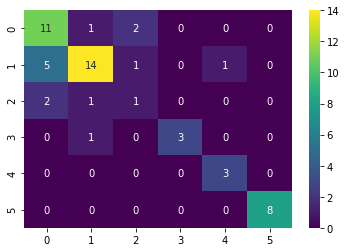

              precision    recall  f1-score   support

           1       0.61      0.79      0.69        14
           2       0.82      0.67      0.74        21
           3       0.25      0.25      0.25         4
           5       1.00      0.75      0.86         4
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         8

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.73        54
weighted avg       0.76      0.74      0.74        54

{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance'}


In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_knn_test))
print(classifier_knn.best_params_)

# Gradient Boost

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_gb = GradientBoostingClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', GradientBoostingClassifier())
]
gb_pipe = Pipeline(steps)

In [21]:
grid_params =  { "model__n_estimators": [100,200],
                "model__loss": ['deviance', 'exponential'],
                "model__learning_rate": [0.1],
                "model__max_features": ['auto', 'sqrt'],
                "model__criterion": ['friedman_mse', 'mse', 'mae'],
                "model__random_state": [42] }
            
classifier_gb = GridSearchCV(gb_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_gb = classifier_gb.fit(X_train, y_train.ravel())

In [22]:
y_pred_gb_train = classifier_gb.predict(X_train)
accuracy_gb_train = accuracy_score(y_train, y_pred_gb_train)
print("Training set: ", accuracy_gb_train)
y_pred_gb_test = classifier_gb.predict(X_test)
accuracy_gb_test = accuracy_score(y_test, y_pred_gb_test)
print("Test set: ", accuracy_gb_test)

Training set:  1.0
Test set:  0.7777777777777778


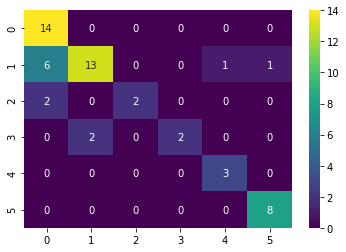

              precision    recall  f1-score   support

           1       0.64      1.00      0.78        14
           2       0.87      0.62      0.72        21
           3       1.00      0.50      0.67         4
           5       1.00      0.50      0.67         4
           6       0.75      1.00      0.86         3
           7       0.89      1.00      0.94         8

    accuracy                           0.78        54
   macro avg       0.86      0.77      0.77        54
weighted avg       0.82      0.78      0.77        54

{'model__criterion': 'friedman_mse', 'model__learning_rate': 0.1, 'model__loss': 'deviance', 'model__max_features': 'sqrt', 'model__n_estimators': 200, 'model__random_state': 42}


In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred_gb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_gb_test))
print(classifier_gb.best_params_)

# AdaBoost

In [24]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ab = AdaBoostClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', AdaBoostClassifier())
]
ab_pipe = Pipeline(steps)

In [25]:
grid_params =  { "model__algorithm": [ 'SAMME.R',  'SAMME'],
                "model__learning_rate":[0.5,1,2,3],
                "model__n_estimators": [50,100,150,200,300],
                "model__random_state" : [42] }

classifier_ab = GridSearchCV(ab_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_ab = classifier_ab.fit(X_train, y_train.ravel())

In [26]:
from sklearn.metrics import accuracy_score
y_pred_ab_train = classifier_ab.predict(X_train)
accuracy_ab_train = accuracy_score(y_train, y_pred_ab_train)
print("Training set: ", accuracy_ab_train)
y_pred_ab_test = classifier_ab.predict(X_test)
accuracy_ab_test = accuracy_score(y_test, y_pred_ab_test)
print("Test set: ", accuracy_ab_test)

Training set:  0.70625
Test set:  0.6481481481481481


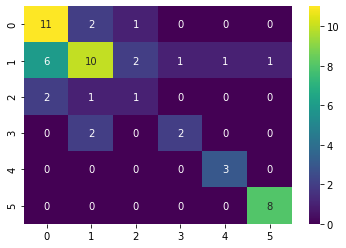

              precision    recall  f1-score   support

           1       0.58      0.79      0.67        14
           2       0.67      0.48      0.56        21
           3       0.25      0.25      0.25         4
           5       0.67      0.50      0.57         4
           6       0.75      1.00      0.86         3
           7       0.89      1.00      0.94         8

    accuracy                           0.65        54
   macro avg       0.63      0.67      0.64        54
weighted avg       0.65      0.65      0.64        54

{'model__algorithm': 'SAMME.R', 'model__learning_rate': 3, 'model__n_estimators': 300, 'model__random_state': 42}


In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred_ab_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_ab_test))
print(classifier_ab.best_params_)

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [29]:
grid_params = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(dt_pipe,grid_params,cv = 3,n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

In [30]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)
y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.925
Test set:  0.6851851851851852


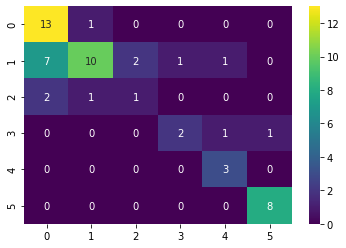

              precision    recall  f1-score   support

           1       0.59      0.93      0.72        14
           2       0.83      0.48      0.61        21
           3       0.33      0.25      0.29         4
           5       0.67      0.50      0.57         4
           6       0.60      1.00      0.75         3
           7       0.89      1.00      0.94         8

    accuracy                           0.69        54
   macro avg       0.65      0.69      0.65        54
weighted avg       0.72      0.69      0.67        54

{'model__criterion': 'gini', 'model__max_depth': 7, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__random_state': 42}


In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_dt_test))
print(classifier_dt.best_params_)

# Visualizing Decision Tree

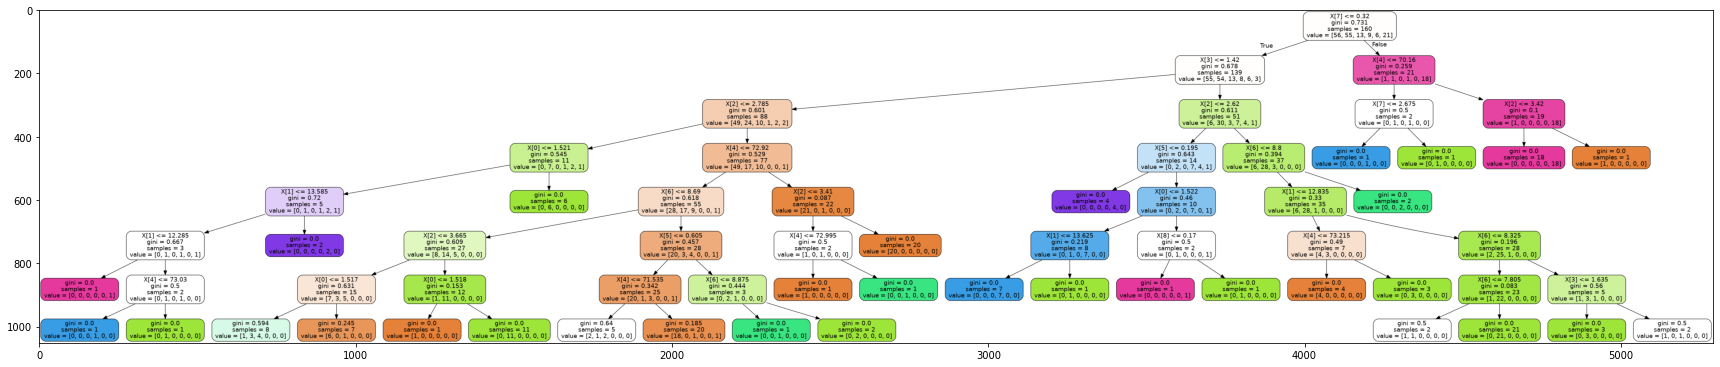

In [32]:
best_tree = classifier_dt.best_estimator_[1].fit(X_train, y_train.ravel())
dot_data = export_graphviz(best_tree, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')    
plt.figure(figsize=(30, 30)) 
plt.imshow(plt.imread('decision_tree.png'))